System test #1:

deducing system state from parallel and series components

In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

0
1


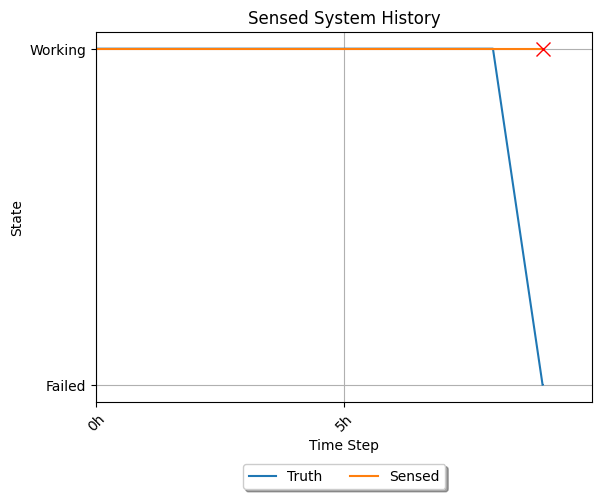

In [2]:
# create and name each sensed component
sys_comps = [SensedComp() for _ in range(6)]
for i, comp in enumerate(sys_comps):
    comp.name = f"Component {i+1}"

# add sensed comps to the system and define parallel connections
sys = System("Parallel", sys_comps, parallels=[(2,3), (4,5)])

# simulate the system until it fails
while sys.state != 0:
    sys.simulate(1)

# print results to excel 
sys.plotHistory()
sys.printHistory2Excel("testResults/parallelSystemTest.xlsx")

print(sys.state)
print(sys.sensedState)


In [3]:
# # create one high reliability component and two low-reliability ones
# states = { 0: 'Critical Failure',
#            1: 'Degredation Failure',
#            2: 'Incipent Failure', 
#            3: 'Normal Operation'}

# high_rel_mat = [[1, 0, 0, 0], 
#                 [0.4, 0.6, 0, 0],
#                 [0.2, 0.2, 0.6, 0],
#                 [0.025, 0.025, 0.05, 0.9]]

# low_rel_mat = [[1, 0, 0, 0], 
#                 [0.6, 0.4, 0, 0],
#                 [0.2, 0.5, 0.3, 0],
#                 [0.1, 0.1, 0.2, 0.6]]

# # assuming all components will have a default sensor with the same states and matrix (good sensing capability)
# sensor_states = {0: 'Faulty',
#                  1: 'Normal Operation'}
# sensor_mat = [[1, 0],
#               [0.5, 0.5]]

# # initialize three sensed components, one sensor attached to each component
# # the sensor is the same for all three components, but they can be different if desired
# sc1 = SensedComp(states, high_rel_mat, sensor_states, sensor_mat, 3, 'High_Reliability_Component')
# sc2 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low_Reliability_Component_1')
# sc3 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low_Reliability_Component_2')

# # create a system from the sensed components
# sensed_components = [sc1, sc2, sc3]
# sys = System('Test System', sensed_components)

# # simulate the system for 10 time steps
# steps = 10
# for step in range(steps):
#     # sys.outputSystemStates()
#     sys.simulate(1)
# sys.plotHistory()

# # testung system ability to print history to excel
# sys.printHistory2Excel('testResults/system_test.xlsx')

In [4]:
# print("Sensor History for sensed components 1:")
# for i in range(len(sys.comps[0].sensors)):
#     print(f"sensor {i} : {sc1.sensors[i].history}")
# # print(sc1.comp.history)
# print(f"Comp True History: {sc1.comp.history}")
# print(f"Comp Sensed History: {sc1.sensedHistory}")
# print("\n")

# print("Sensor History for sensed components 2:")    
# for i in range(len(sys.comps[1].sensors)):
#     print(f"sensor {i} : {sc2.sensors[i].history}")
# print(f"Comp True History: {sc2.comp.history}")
# print(f"Comp Sensed History: {sc2.sensedHistory}")
# print("\n")

# print("Sensor History for sensed components 2:")    
# for i in range(len(sys.comps[2].sensors)):
#     print(f"sensor {i} : {sc3.sensors[i].history}")
# print(f"Comp True History: {sc3.comp.history}")
# print(f"Comp Sensed History: {sc3.sensedHistory}")


### Simulating a series system

In [5]:
# # defining four components for testing
# comp_states = { 0: 'Critical Failure',
#            1: 'Degredation Failure',
#            2: 'Incipent Failure', 
#            3: 'Normal Operation'}

# comp_transition_mat = [[1, 0, 0, 0], 
#                        [0.4, 0.6, 0, 0],
#                        [0.1, 0.2, 0.7, 0],
#                        [0.025, 0.025, 0.05, 0.9]]

# sensor_states = {0: 'Faulty',
#                  1: 'Normal Operation'}
# sensor_mat = [[1, 0],
#               [0.02, 0.98]]

# # initialize four components with the same transition matrix and states
# comp1 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_1')
# comp2 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_2')
# comp3 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_3')
# comp4 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_4')

# # create a series system from the components
# sys = System('series_system', [comp1, comp2, comp3, comp4])
# # sys.simulate(10)
# # for i in range(10):
# #     sys.simulate(1)
# #     print(f"Simulation step {i+1}")
# #     sys.outputSystemStates()
# #     print("\n")
    
# sys.plotHistory()


### Simulating a parallel system

In [6]:
# # defining four components for testing
# comp_states = { 0: 'Critical Failure',
#            1: 'Degredation Failure',
#            2: 'Incipent Failure', 
#            3: 'Normal Operation'}

# comp_transition_mat = [[1, 0, 0, 0], 
#                        [0.4, 0.6, 0, 0],
#                        [0.1, 0.2, 0.7, 0],
#                        [0.025, 0.025, 0.05, 0.9]]

# sensor_states = {0: 'Faulty',
#                  1: 'Normal Operation'}
# sensor_mat = [[1, 0],
#               [0.02, 0.98]]

# # initialize four components with the same transition matrix and states
# comp1 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_1')
# comp2 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_2')
# comp3 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_3')
# comp4 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_4')

# # create a parallel system from the components
# sys2 = System('series_system', [comp1, comp2, comp3, comp4], parallels=[(1,2,3,4)])
# # sys2.simulate(10)
# for i in range(10):
#     sys2.simulate(1)
#     print(f"Simulation step {i+1}")
#     sys2.outputSystemStates()
#     print("\n")
    
# sys2.plotHistory()

### Simulating a series-parallel system

In [7]:
# # defining four components for testing
# comp_states = { 0: 'Critical Failure',
#            1: 'Degredation Failure',
#            2: 'Incipent Failure', 
#            3: 'Normal Operation'}

# comp_transition_mat = [[1, 0, 0, 0], 
#                        [0.4, 0.6, 0, 0],
#                        [0.1, 0.2, 0.7, 0],
#                        [0.025, 0.025, 0.05, 0.9]]

# sensor_states = {0: 'Faulty',
#                  1: 'Normal Operation'}
# sensor_mat = [[1, 0],
#               [0.02, 0.98]]

# # initialize four components with the same transition matrix and states
# comp1 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_1')
# comp2 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_2')
# comp3 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_3')
# comp4 = SensedComp(comp_states, comp_transition_mat, sensor_states, sensor_mat, 3, 'Component_4')

# # create a series system from the components with two parallel branches
# sys3 = System('series_system', [comp1, comp2, comp3, comp4], parallels=[(1,2),(3,4)])
# # sys3.simulate(10)

# for i in range(10):
#     sys3.simulate(1)
#     print(f"Simulation step {i+1}")
#     sys3.outputSystemStates()
#     print("\n")

# sys3.plotHistory()

Extra Functions, Ideas, and Examples